In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

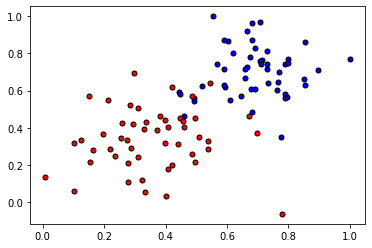

In [3]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [4]:
#activation sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    error = -y*(np.log(output))- (1-y)*(np.log(1 - output))
    return error
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x,weights,bias)
    weights +=  x*learnrate*(y - output)
    bias = learnrate*(y - output)
    return weights, bias

In [5]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            
            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.7161117240582224
Accuracy:  0.41

========== Epoch 10 ==========
Train loss:  0.6524677945186322
Accuracy:  0.51

========== Epoch 20 ==========
Train loss:  0.6499832785608678
Accuracy:  0.5

========== Epoch 30 ==========
Train loss:  0.6496192797097429
Accuracy:  0.5

========== Epoch 40 ==========
Train loss:  0.6491699798270174
Accuracy:  0.5

========== Epoch 50 ==========
Train loss:  0.6486895420764234
Accuracy:  0.5

========== Epoch 60 ==========
Train loss:  0.6482280930355948
Accuracy:  0.5

========== Epoch 70 ==========
Train loss:  0.6477989061015426
Accuracy:  0.5

========== Epoch 80 ==========
Train loss:  0.6474034361161038
Accuracy:  0.5

========== Epoch 90 ==========
Train loss:  0.6470400559054984
Accuracy:  0.5


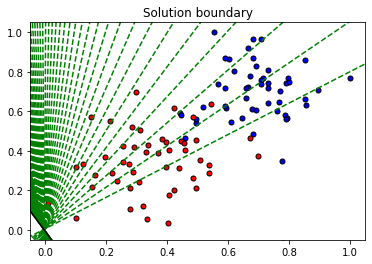

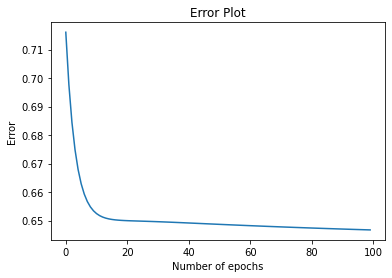

In [6]:
train(X, y, epochs, learnrate, True)